# Распределение Вейбулла

Данное распределение нашло широкое применение при оценке надежности технологического оборудования. Оно бывает 2-х,3-х параметрическое,экспоненциальной.

О распраделении можно узнать на https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%92%D0%B5%D0%B9%D0%B1%D1%83%D0%BB%D0%BB%D0%B0.

Подробнее с реальным применением этого распределения (и многих других) можно ознакомиться в E. Calixto Gas and oil reliability engineering : modeling and analysis.

Справка по функции SkiPy для данного распределения http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull

In [138]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dweibull
from scipy.stats import norm
%matplotlib inline

## 0. Определим распределение

In [139]:
beta = 5 #параметр формы
weibull = dweibull(beta)# зададим случайную величину

#зададим массив точек (понадобится для построения)
x = np.linspace(weibull.ppf(0.01),
                weibull.ppf(0.99), 100)

## 1.

### Генерируем выборку случайной величины с параметром формы $\beta=5$ длиной 1000.

In [140]:
# сгенерируем 1000 значений
sample = weibull.rvs(size=1000)

### Построение. Гистограмма выборки + теоретическая плотность распределения:

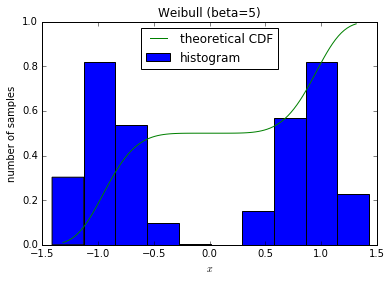

In [141]:
#гистограмма
plt.hist(sample, normed=True, label='histogram')
#теоретическая плотность распределения
plt.plot(x, weibull.cdf(x), label='theoretical CDF')
#параметры графика
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='upper center')
plt.title("Weibull (beta=5)")

## 2.

### Параметры распределения Вейбулла

In [142]:
wMean = weibull.mean() #среднее
wVariance = weibull.var()   #дисперсия
print "Среднее:",wMean, " Дисперсия:", wVariance

Среднее: 0.0  Дисперсия: 0.887263817503


### Параметры нормальных распределений

In [143]:
# Среднее = Среднему исходного распределения
# Дисперсия = D/n (где D-дисперсия исходного распределения)
nVariance3  = wVariance/3.
nVariance10 = wVariance/10.
nVariance150 = wVariance/150.
print "Среднее:",wMean
print "Дисперсия n=3: ", nVariance3, "  Дисперсия n=10: ", nVariance10, "  Дисперсия n=150: ", nVariance150

Среднее: 0.0
Дисперсия n=3:  0.295754605834   Дисперсия n=10:  0.0887263817503   Дисперсия n=150:  0.00591509211669


### Генерация выборок нормального распределения длиной n= [3, 10, 150].

In [144]:
# зададим нормально распределенную случайную величину
norm_3 = sts.norm(loc=wMean, scale=np.sqrt(nVariance3))
norm_10 = sts.norm(loc=wMean, scale=np.sqrt(nVariance10))
norm_150 = sts.norm(loc=wMean, scale=np.sqrt(nVariance150))

### Генерация выборок выбранного распределения с параметром формы $\beta=5$ длиной n= [3, 10, 150].

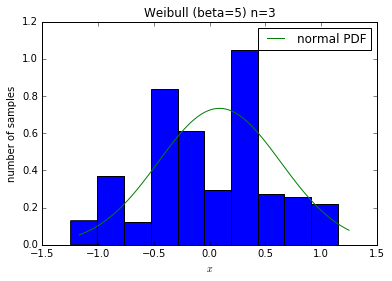

In [145]:
# сгенерируем 1000 выборок по 3 значения
ASample3 = np.array([weibull.rvs(size=3) for x in range(1000)])
# построим гистограмму
plt.hist(ASample3.mean(axis=1), normed=True)
# добавим плотность нормального распределения
xN = np.linspace(ASample3.mean(axis=1).min(),
                  ASample3.mean(axis=1).max(), 100)
plt.plot(xN3, norm_3.pdf(xN), label='normal PDF')
#параметры графика
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.title("Weibull (beta=5) n=3")
plt.legend()

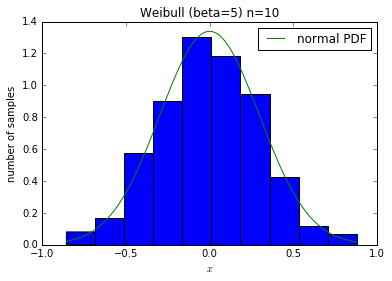

In [146]:
# сгенерируем 1000 выборок по 10 значений
ASample10 = np.array([weibull.rvs(size=10) for x in range(1000)])
# построим гистограмму
plt.hist(ASample10.mean(axis=1), normed=True)
# добавим плотность нормального распределения
xN = np.linspace(ASample10.mean(axis=1).min(),
                  ASample10.mean(axis=1).max(), 100)
plt.plot(xN, norm_10.pdf(xN), label='normal PDF')
#параметры графика
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.title("Weibull (beta=5) n=10")
plt.legend()

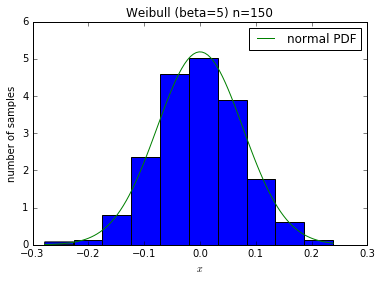

In [147]:
# сгенерируем 1000 выборок по 150 значений
ASample150 = np.array([weibull.rvs(size=150) for x in range(1000)])
# построим гистограмму
plt.hist(ASample150.mean(axis=1), normed=True)
# добавим плотность нормального распределения
xN = np.linspace(ASample150.mean(axis=1).min(),
                  ASample150.mean(axis=1).max(), 100)
plt.plot(xN, norm_150.pdf(xN), label='normal PDF')
#параметры графика
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.title("Weibull (beta=5) n=150")
plt.legend()

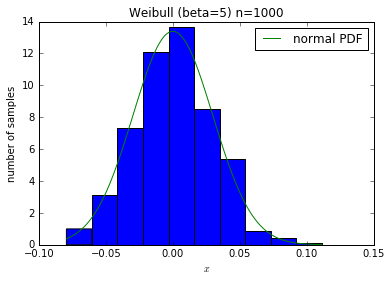

In [148]:
norm_1000 = sts.norm(loc=wMean, scale=np.sqrt(wVariance/1000.))
# сгенерируем 1000 выборок по 1000 значений
ASample = np.array([weibull.rvs(size=1000) for x in range(1000)])
# построим гистограмму
plt.hist(ASample.mean(axis=1), normed=True)
# добавим плотность нормального распределения
xN = np.linspace(ASample.mean(axis=1).min(),
                  ASample.mean(axis=1).max(), 100)
plt.plot(xN, norm_1000.pdf(xN), label='normal PDF')
#параметры графика
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.title("Weibull (beta=5) n=1000")
plt.legend()

## Выводы

При увеличении n график становится все больше походить на нормальное распределение.